In [1]:
import os
import shutil
import nibabel as nib
import numpy as np
import torchio as tio
import cv2 as cv
import pyvista as pv
from Image_Resizing import resize_images_to_moving_reference
from Image_Normalization import save_array_to_nifti1, apply_processing_to_img_folder

In [3]:
atlas_mask = nib.load("E:\\Data_Booster\\Atlas_TOF3D\\Atlas_Files\\TOF atlas_segmentation.nii.gz").get_fdata()

In [11]:
atlas_mask_homogenized = np.where(atlas_mask > 0, 1, atlas_mask)

In [13]:
def renumber_mask (array):
    return np.where(array > 0, 1, array)

In [9]:
np.unique(atlas_mask, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([23617791,     3564,    15482,     8132,     4309,     5122],
       dtype=int64))

In [12]:
np.unique(atlas_mask_homogenized, return_counts=True)

(array([0., 1.]), array([23617791,    36609], dtype=int64))

In [7]:
source_swi_dir = "E:\\Data_Booster\\data_ETIS_781\\SWI"
target_atlas_dir = "E:\\Data_Booster\\Atlas_TOF3D\\Processed_Atlas\\Duplicated_Atlas"

In [11]:
for file in os.listdir(source_swi_dir):
    new_atlas_filename = "_".join(file.split("_")[:2]) + "_Atlas.nii.gz"
    shutil.copyfile("E:\\Data_Booster\\Atlas_TOF3D\\Atlas_Files\\TOF atlas_segmentation.nii.gz", os.path.join(target_atlas_dir, new_atlas_filename))

In [14]:
apply_processing_to_img_folder(renumber_mask, target_atlas_dir, "E:\\Data_Booster\\Atlas_TOF3D\\Processed_Atlas\\Renumbered_Atlas", "")

Processed image  2018-104_01-10087-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10113-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10114-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10116-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10117-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10118-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10120-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10124-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10126-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10128-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10129-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10136-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10151-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10165-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10167-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10170-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10172-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10173-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10174-D0MR_Atlas.

In [23]:
renumbered_dir = "E:\\Data_Booster\\Atlas_TOF3D\\Processed_Atlas\\Renumbered_Atlas"
for file in os.listdir(renumbered_dir):
    os.rename(os.path.join(renumbered_dir, file), os.path.join(renumbered_dir, file[:-8]+".nii.gz"))

In [24]:
resize_images_to_moving_reference("E:\\Data_Booster\\Atlas_TOF3D\\Processed_Atlas\\Renumbered_Atlas", "E:\\Data_Booster\\Atlas_TOF3D\\Processed_Atlas\\Resized_Atlas", source_swi_dir, image_is_label=True, transform_to_canonical=True, interpolation_method="lanczos", modification_string="Resized_Canonical")

Processed image  2018-104_01-10087-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10113-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10114-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10116-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10117-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10118-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10120-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10124-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10126-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10128-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10129-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10136-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10151-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10165-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10167-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10170-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10172-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10173-D0MR_Atlas.nii.gz
Processed image  2018-104_01-10174-D0MR_Atlas.

In [3]:
resized_dir = "E:\\Data_Booster\\Atlas_TOF3D\\Processed_Atlas\\Resized_Atlas"
mask_img = nib.load(resized_dir+"\\2018-104_01-10087-D0MR_Atlas_Resized_Canonical.nii.gz")
mask_data = mask_img.get_fdata()

In [3]:
pv.set_jupyter_backend("none")

In [4]:
plotter = pv.Plotter()
plotter.add_mesh(pv.Sphere())
plotter.show()

AttributeError: 'NoneType' object has no attribute 'lower'

c:\Users\wijflo\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


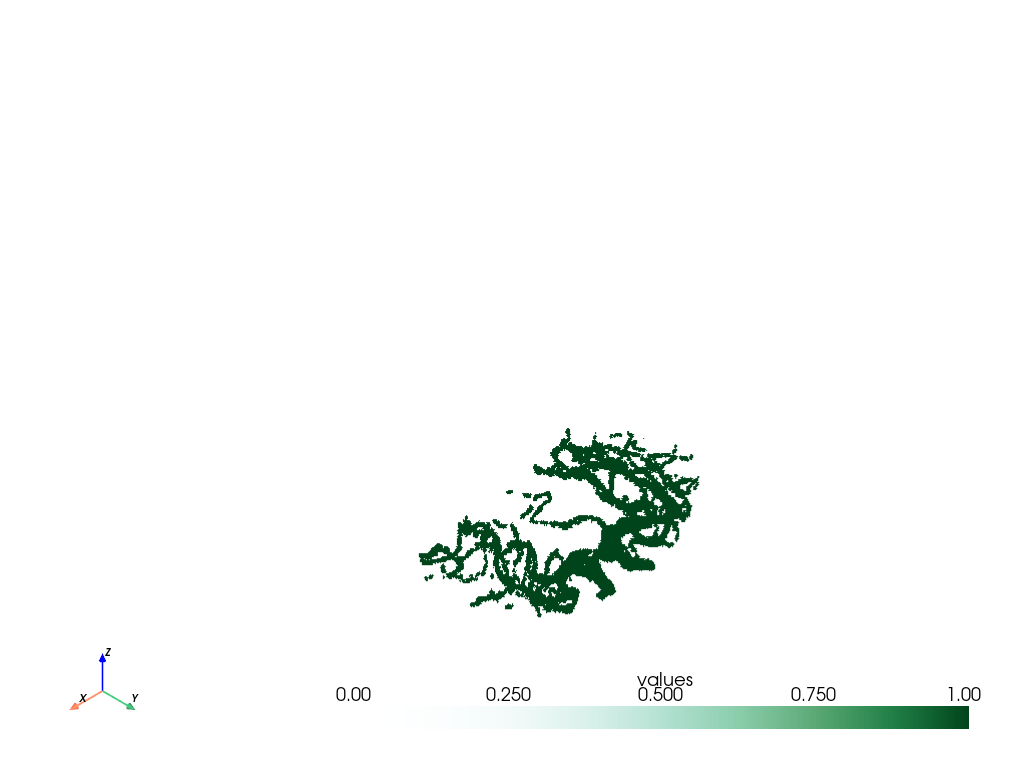

In [4]:
grid = pv.ImageData()

grid.dimensions = np.array(mask_data.shape)

origin = mask_img.affine[:3,3]
grid.origin = tuple(origin)

spacing = mask_img.header.get_zooms()
grid.spacing = spacing

grid.point_data["values"] = mask_data.flatten(order="F")

plotter = pv.Plotter()
opacity = [0,1]
plotter.add_volume(grid, scalars="values", opacity=opacity, cmap="BuGn")

plotter.add_axes()
plotter.show()
